In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv


In [2]:
# let's start on mercedes car
cclass = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv')
focus = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv')
audi = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv')
toyota = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv')
skoda = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv')
ford = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv')
vauxhall = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv')
bmw = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv')
vw = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv')
hyundai = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv')
merc = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv')
data = toyota.copy()
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


* mpg - miles per gallon
* tax - road tax

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


# EDA

<AxesSubplot:xlabel='price', ylabel='Count'>

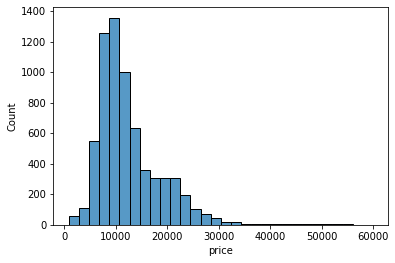

In [4]:
# check price distribution
sns.histplot(data['price'], bins=30)

In [5]:
def plot_numerical(feature):
    ax = sns.lmplot(x=feature, y='price', data=data)
    ax.set_xticklabels(rotation=85)
    plt.show()
    
def plot_categorical(feature, figsize=None):
    df = data.groupby([feature])['price'].describe()[['mean', '50%', 'min', 'count']]

    labels = df.index.values
    x = np.arange(len(labels))
    width = 0.9
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # plot bars for min, median and mean house price
    rects1 = ax1.bar(x-width/2, df['50%'], width/3, label='median')
    rects2 = ax1.bar(x-width/6, df['mean'], width/3, label='mean')
    rects3 = ax1.bar(x+width/6, df['min'], width/3, label='min')

    ax1.set_ylabel('price', fontsize=15)
    ax1.set_title(feature, fontsize=18)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, rotation=85)
    ax1.legend()

    # plot counts of data points
    ax2 = ax1.twinx()
    ax2.set_ylabel('Counts', fontsize=15)
    ax2.plot(x-width/2, df['count'], color='red', linestyle='dashed')

    # annotate counts of data points
    for i, rect in enumerate(rects2):
        height = int(round(rect.get_height()))
        ax1.annotate('{}'.format(int(df['count'].iloc[i])),
                     xy=(rect.get_x() + rect.get_width()/2, height),
                     xytext=(0, 3), textcoords="offset points",
                     ha='center', va='bottom', color='red')
    plt.show()

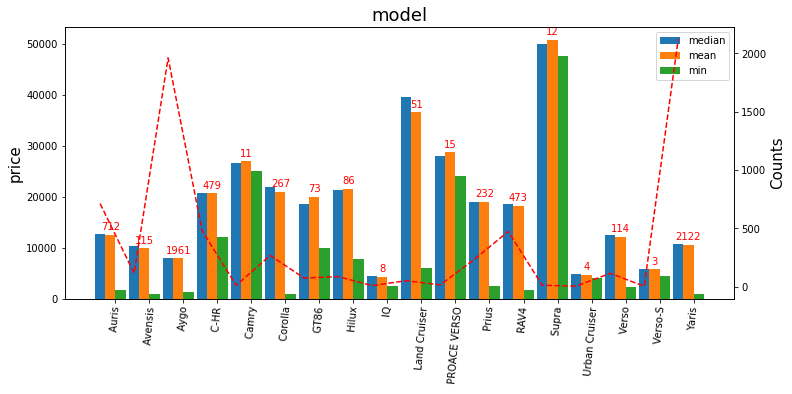

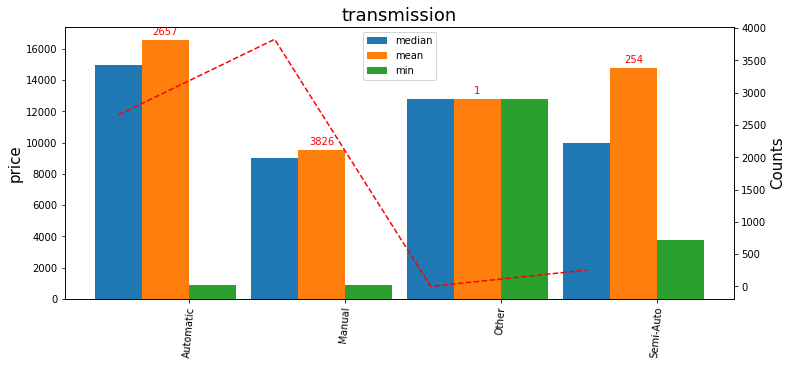

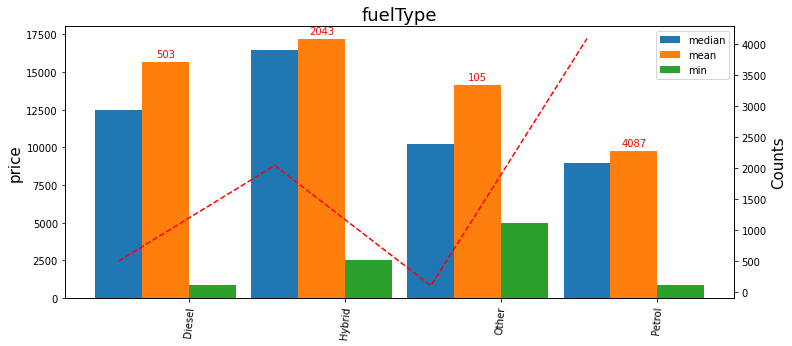

In [6]:
for feature in ['model', 'transmission', 'fuelType']:
    plot_categorical(feature)

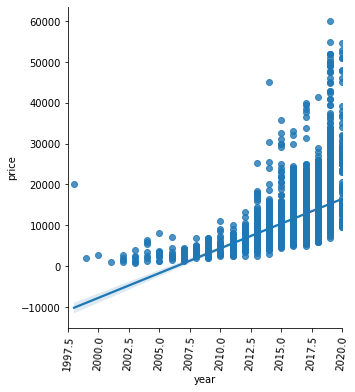

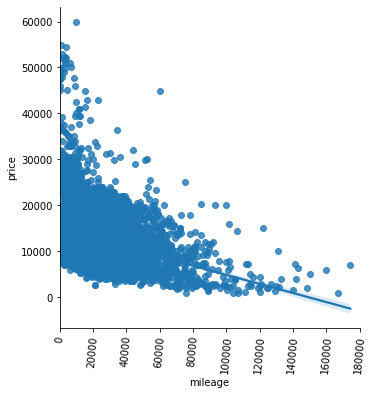

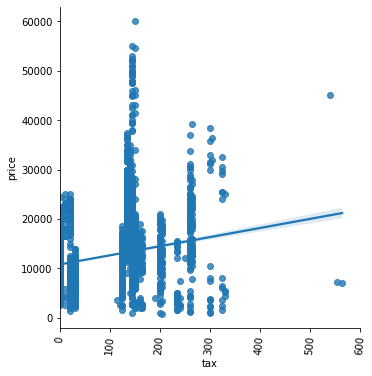

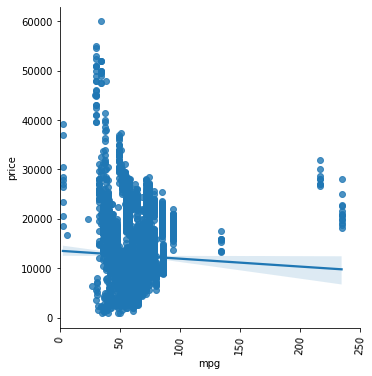

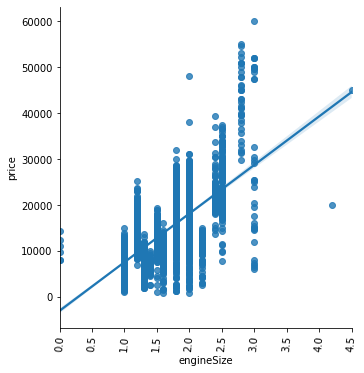

In [7]:
for feature in ['year', 'mileage', 'tax', 'mpg', 'engineSize']:
    plot_numerical(feature)

**Observations-**
* model - Supra models are the costliest ones while Aygo and Yaris are the most popular ones
* transmission - Manual has usually low cost
* fuelType - Petrol models are the cheapest ones
* year - new cars are sold at higher prices
* mileage - lower the mileage or car travelled, higher the price
* mpg - lower the mpg, higher the car price (usually heavy or luxury cars have lower mpg)
* engineSize - bigger the enginer, higher the price
* tax - generally higher the tax, higher the car price

In [8]:
categorical_features = ['model', 'transmission', 'fuelType']
numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

# CORRELATION

### Label encoding categorical features for correlation

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib

In [10]:
df = data.copy()
path = '/kaggle/working'
for i, feature in enumerate(categorical_features):
    le = LabelEncoder()

    # create directory to save label encoding models
    if not os.path.exists(os.path.join(path, "TextEncoding")):
        os.makedirs(os.path.join(path, "TextEncoding"))

    # perform label encoding
    le.fit(df[feature])
    #print(feature)
    
    # save the encoder
    joblib.dump(le, open(os.path.join(path, "TextEncoding/le_{}.sav".format(feature)), 'wb'))
    
    # transfrom training data
    df[feature] = le.transform(df[feature])

    # get classes & remove first column to elude from dummy variable trap
    columns = list(map(lambda x: feature+' '+str(x), list(le.classes_)))[1:]
    
    # save classes
    joblib.dump(columns, 
                open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'wb'))

### Bivariate Analysis Correlation plot for numerical features

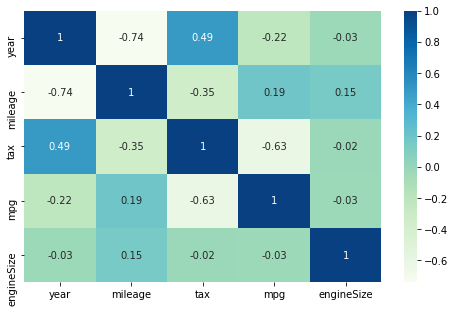

In [11]:
plt.figure(figsize=(8, 5))
sns.heatmap(round(data[numerical_features].corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='GnBu')
plt.show()

### Bivariate Analysis Correlation plot with the Categorical variables

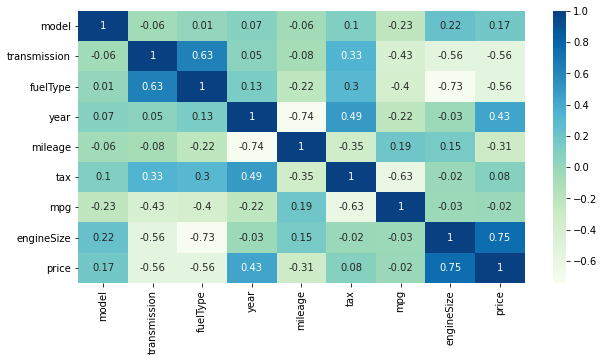

In [12]:
plt.figure(figsize=(10, 5))
sns.heatmap(round(df[categorical_features+numerical_features+['price']].corr(method='spearman'), 2), annot=True,
            mask=None, cmap='GnBu')
plt.show()


**Observations-**
* year - mileage -ve
* mpg - tax -ve
* year - mileage
* transmission - fuelType
* fuelType - engineSize -ve

# Analyzing features using VIF

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
# Calculating VIF
vif = pd.DataFrame()
vif["variables"] = [feature for feature in categorical_features+numerical_features if feature not in ['year']]
vif["VIF"] = [variance_inflation_factor(df[vif['variables']].values, i) for i in range(len(vif["variables"]))]
print(vif)

      variables        VIF
0         model   2.640893
1  transmission   2.903885
2      fuelType   6.306291
3       mileage   2.660140
4           tax   3.503499
5           mpg  10.542839
6    engineSize  12.809195


# Looking at Outliers

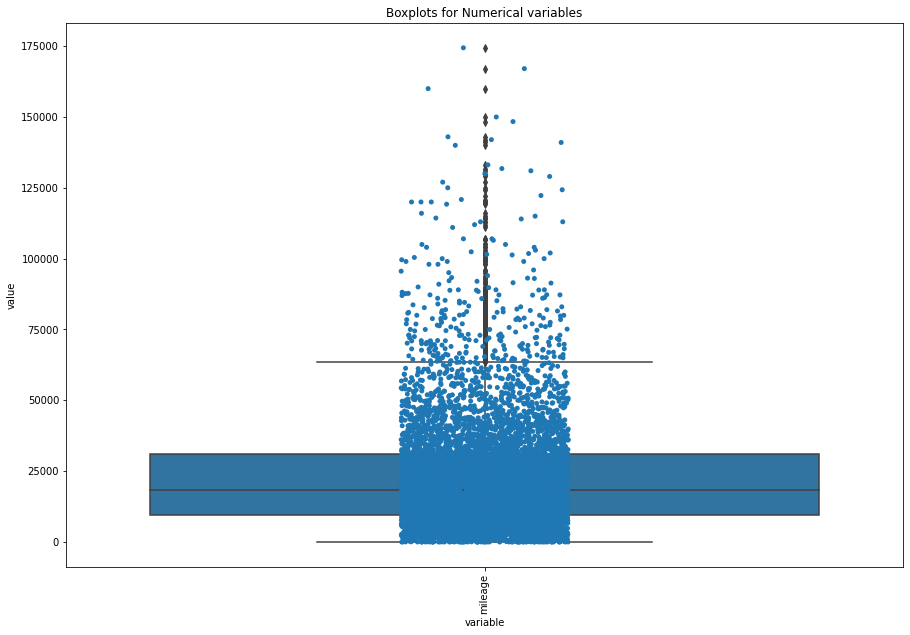

In [15]:
NumericData = data[['mileage']]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=NumericMelt)
bp = sns.stripplot(x='variable', y='value', data=NumericMelt, jitter=True, edgecolor='gray')
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

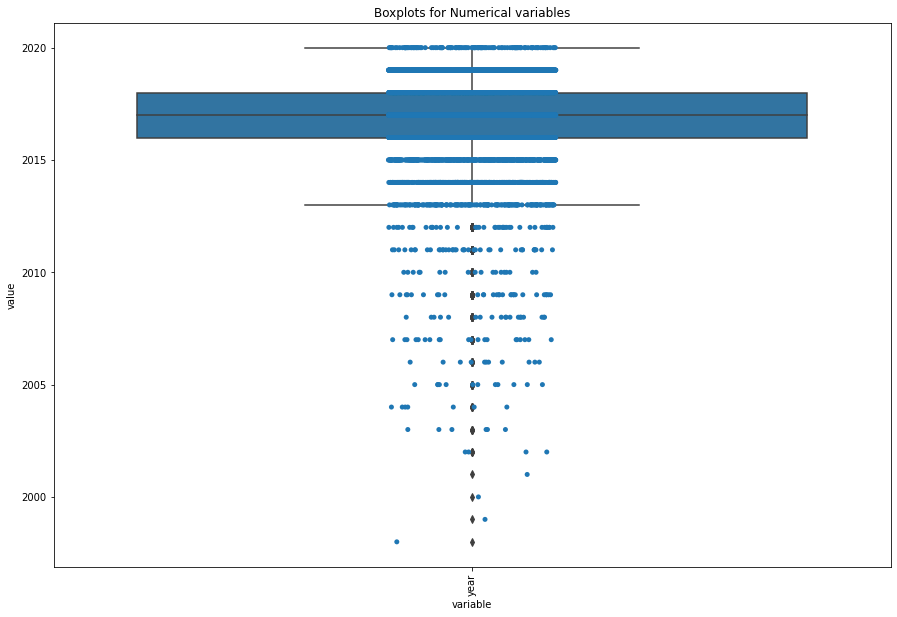

In [16]:
NumericData = data[['year']]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=NumericMelt)
bp = sns.stripplot(x='variable', y='value', data=NumericMelt, jitter=True, edgecolor='gray')
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

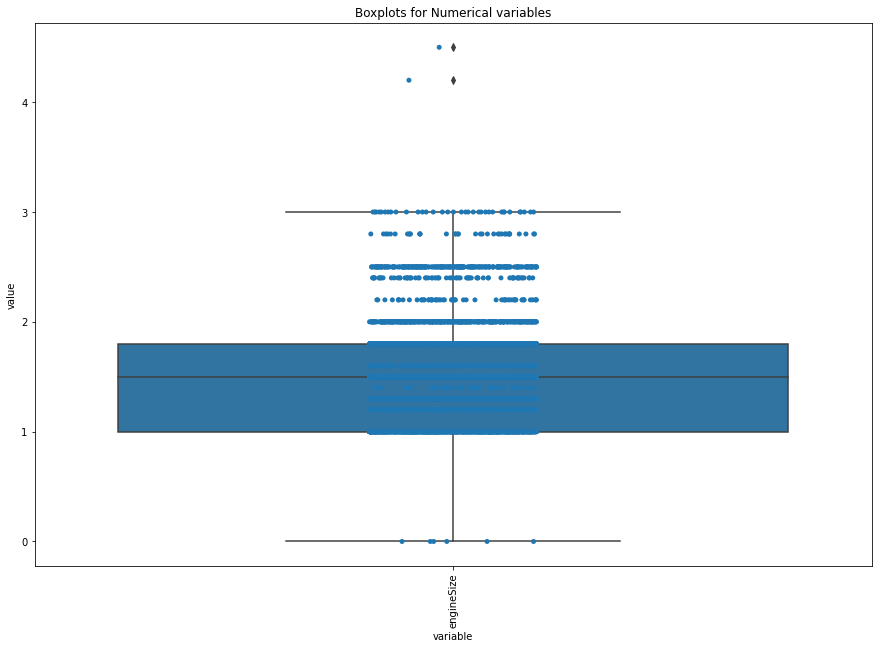

In [17]:
NumericData = data[['engineSize']]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=NumericMelt)
bp = sns.stripplot(x='variable', y='value', data=NumericMelt, jitter=True, edgecolor='gray')
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

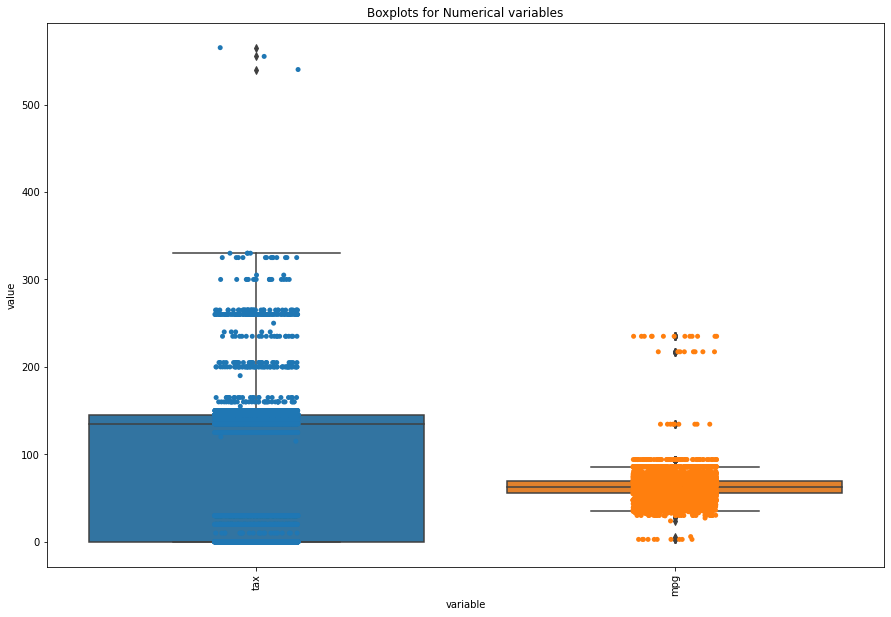

In [18]:
NumericData = data[['tax', 'mpg']]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=NumericMelt)
bp = sns.stripplot(x='variable', y='value', data=NumericMelt, jitter=True, edgecolor='gray')
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

In [19]:
# Percentage of outliers present in each variable
outlier_percentage = {}
for feature in numerical_features:
    tempData = data.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'year': 3.15, 'mileage': 3.99, 'tax': 0.04, 'mpg': 3.09, 'engineSize': 0.03}

# Handling Categorical Features (Label Encoding & One Hot Encoding)

In [20]:
df = data.copy()
path = '/kaggle/working'
for i, feature in enumerate(categorical_features):
    
    le = LabelEncoder()
    ohe = OneHotEncoder(sparse=False)

    # create directory to save label encoding models
    if not os.path.exists(os.path.join(path, "TextEncoding")):
        os.makedirs(os.path.join(path, "TextEncoding"))

    # perform label encoding
    le.fit(df[feature])
    # save the encoder
    joblib.dump(le, open(os.path.join(path, "TextEncoding/le_{}.sav".format(feature)), 'wb'))
    
    # transfrom training data
    df[feature] = le.transform(df[feature])

    # get classes & remove first column to elude from dummy variable trap
    columns = list(map(lambda x: feature+' '+str(x), list(le.classes_)))[1:]
    
    # save classes
    joblib.dump(columns, 
                open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'wb'))
    # load classes
    columns = joblib.load(
        open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'rb'))

    if len(le.classes_)>2:
        # perform one hot encoding
        ohe.fit(df[[feature]])
        # save the encoder
        joblib.dump(ohe, 
                    open(os.path.join(path, "TextEncoding/ohe_{}.sav".format(feature)), 'wb'))

        # transfrom training data
        # removing first column of encoded data to elude from dummy variable trap
        tempData = ohe.transform(df[[feature]])[:, 1:]

        # create Dataframe with columns as classes
        tempData = pd.DataFrame(tempData, columns=columns)
    else:
        tempData = df[[feature]]
    
    # create dataframe with all the label encoded categorical features along with hot encoding
    if i==0:
        encodedData = pd.DataFrame(data=tempData, columns=tempData.columns.values.tolist())
    else:
        encodedData = pd.concat([encodedData, tempData], axis=1)

In [21]:
# merge numerical features and categorical encoded features
df = df[numerical_features+['price']]
df = pd.concat([df, encodedData], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    6738 non-null   int64  
 1   mileage                 6738 non-null   int64  
 2   tax                     6738 non-null   int64  
 3   mpg                     6738 non-null   float64
 4   engineSize              6738 non-null   float64
 5   price                   6738 non-null   int64  
 6   model  Avensis          6738 non-null   float64
 7   model  Aygo             6738 non-null   float64
 8   model  C-HR             6738 non-null   float64
 9   model  Camry            6738 non-null   float64
 10  model  Corolla          6738 non-null   float64
 11  model  GT86             6738 non-null   float64
 12  model  Hilux            6738 non-null   float64
 13  model  IQ               6738 non-null   float64
 14  model  Land Cruiser     6738 non-null   

# Training Model

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics, preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [23]:
train_data = df.copy()
feature_cols = [feature for feature in train_data.columns if feature not in(['price'])]
print('features used: ', feature_cols)

# RESCALING
#scaler = MinMaxScaler()
#scaler.fit(train_data[feature_cols])
#train_data[feature_cols] = scaler.transform(train_data[feature_cols])

features used:  ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model  Avensis', 'model  Aygo', 'model  C-HR', 'model  Camry', 'model  Corolla', 'model  GT86', 'model  Hilux', 'model  IQ', 'model  Land Cruiser', 'model  PROACE VERSO', 'model  Prius', 'model  RAV4', 'model  Supra', 'model  Urban Cruiser', 'model  Verso', 'model  Verso-S', 'model  Yaris', 'transmission Manual', 'transmission Other', 'transmission Semi-Auto', 'fuelType Hybrid', 'fuelType Other', 'fuelType Petrol']


In [24]:
X = train_data[feature_cols]
y = train_data['price']

validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=0)

# Model 1: Linear Regresssion 

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_train)

print('Train metrics...')
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('r2_score: ', round(r2_score(y_train, y_pred)*100, 2))

y_pred = model.predict(X_test)

print('Validation metrics...')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', round(r2_score(y_test, y_pred)*100, 2))

Train metrics...
RMSE:  1674.108311570081
r2_score:  92.97
Validation metrics...
RMSE:  1820.7787165656443
r2_score:  92.06


In [27]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_pred[-150:]))), y=y_pred[-150:],
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test[-150:]))), y=y_test[-150:],
                         mode='lines',
                         name='True value'))

fig.show()

# Model 2: XGB

In [28]:
model = XGBRegressor( 
    n_estimators = 1000,
    learning_rate=0.09, 
    min_child_weight=5,
    max_depth = 3,
    subsample = 0.75,
    seed=7)


model = model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    #early_stopping_rounds=10,
    #eval_set=[(X_test, y_test)],
    verbose=False)

In [29]:
y_pred = model.predict(X_train)

print('Train metrics...')
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('r2_score: ', round(r2_score(y_train, y_pred)*100, 2))

y_pred = model.predict(X_test)

print('Validation metrics...')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', round(r2_score(y_test, y_pred)*100, 2))

Train metrics...
RMSE:  877.0837638233434
r2_score:  98.07
Validation metrics...
RMSE:  1223.4860457941757
r2_score:  96.41


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



In [30]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_pred[-150:]))), y=y_pred[-150:],
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test[-150:]))), y=y_test[-150:],
                         mode='lines',
                         name='True value'))

fig.show()